# DNN Classifier

In [357]:
#imports
import numpy as np
import pandas as pd

import random
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

### Prephare Data

In [358]:
n_points = 1000000

noise = np.random.randn(n_points)
print(noise)

x1 = np.linspace(10,20.0,n_points) + noise
np.random.shuffle(x1) #Shuffle data so X1 and X2 are not correlated
print(x1)

x2= np.linspace(10,20.0,n_points) + 2*noise
print(x2)


[-0.545775    0.34202796  0.82415983 ... -1.26323629  1.03998601
  1.63319666]
[17.69528065 12.53717168 15.92220978 ... 15.05079864 11.74538007
 12.33452804]
[ 8.90845001 10.68406592 11.64833966 ... 17.47350742 22.07996202
 23.26639331]


In [376]:
#Equation
y_true = (0.5 * x1) + 100*x1**2  -5*(x2)  + 5 + noise #+2*x1*x2  
y_true

array([31281.05535029, 15676.25766009, 25307.219983  , ...,
       22576.54858353, 13696.90817254, 15110.52669019])

In [377]:
data = pd.concat([pd.DataFrame(data=x1_data,columns=['X1']),pd.DataFrame(data=x2_data,columns=['X2']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)
data.head()

,X1,X2,Y
0,9.247327,-5.519762,31281.055350
1,6.055220,-6.456785,15676.257660
2,3.378084,-6.068743,25307.219983
3,-4.431267,-4.390808,18938.459750
4,-5.232778,-7.630487,39782.656841


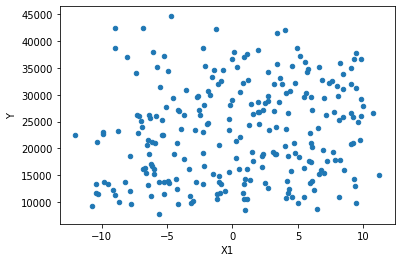

In [378]:
data.sample(n=250).plot(kind='scatter',x='X1',y='Y')

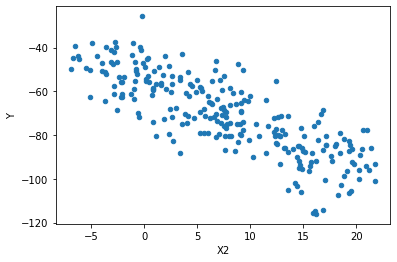

In [375]:
data.sample(n=250).plot(kind='scatter',x='X2',y='Y')

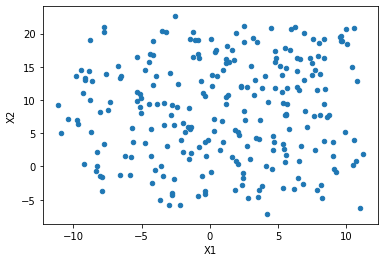

In [366]:
data.sample(n=250).plot(kind='scatter',x='X1',y='X2')

### Fit linear regression model

In [379]:
X = data[['X1','X2']]
Y = data['Y']

In [380]:
#teriible r squared 
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.433
Model:                            OLS   Adj. R-squared (uncentered):              0.433
Method:                 Least Squares   F-statistic:                          3.816e+05
Date:                Sat, 04 Apr 2020   Prob (F-statistic):                        0.00
Time:                        21:02:20   Log-Likelihood:                     -1.1267e+07
No. Observations:             1000000   AIC:                                  2.253e+07
Df Residuals:                  999998   BIC:                                  2.253e+07
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1             1.5561      3.229      0.482      0.630      -4.772       7.885
X2          1559.6247      1.785    873.620      0.000    1556.126    1563.124
==============================================================================
Omnibus:                    22446.441   Durbin-Watson:                   0.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12267.715
Skew:                           0.076   Prob(JB):                         0.00
Kurtosis:                       2.479   Cond. No.                         1.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [381]:
Y_pred = results.predict(X)

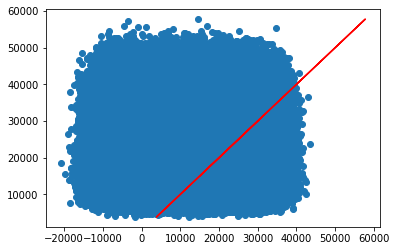

In [382]:
#Terrible fit
plt.scatter(x = Y_pred, y = Y)
plt.plot(Y, Y,'r') 

#This is because you are trying to fit a linear model where the target vaiable does not have a 
#linear relationship with the explanitory variables 

### Add transformations and interactions
Suppose we have some domain knowledge...
<br>
y_true =  (0.5 * x1) + X3 -5*(x2) +2*X4 + 5 + noise


<br>
We have rewritten the   function as a linear funciton and can now use a linear function

In [383]:
data['X3'] = x1**2
data['X4'] = x1*x2
data[['X1','X2','X3','X4']]

,X1,X2,X3,X4
0,9.247327,-5.519762,313.122957,157.637523
1,6.055220,-6.456785,157.180674,133.947969
2,3.378084,-6.068743,253.516764,185.467308
3,-4.431267,-4.390808,189.797760,147.578086
4,-5.232778,-7.630487,398.078456,155.911606
...,...,...,...,...
999995,-5.274462,15.412712,116.933953,226.304458
999996,-6.331287,23.102598,248.315309,340.245568
999997,-7.656027,22.633418,226.526540,262.990242
999998,2.160515,22.871761,137.953953,259.337546


In [384]:
X = data[['X1','X2','X3','X4']]
Y = data['Y']

In [385]:
#r squard is a lot better 
#Figure out why parameters not the same as function 
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.467e+12
Date:                Sat, 04 Apr 2020   Prob (F-statistic):                        0.00
Time:                        21:02:33   Log-Likelihood:                     -3.7580e+06
No. Observations:             1000000   AIC:                                  7.516e+06
Df Residuals:                  999996   BIC:                                  7.516e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.0008      0.002      0.480      0.631      -0.003       0.004
X2             0.1547      0.002     73.157      0.000       0.151       0.159
X3           100.1512      0.000   5.34e+05      0.000     100.151     100.152
X4            -0.4280      0.000  -1703.249      0.000      -0.429      -0.428
==============================================================================
Omnibus:                    59670.764   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72970.573
Skew:                           0.602   Prob(JB):                         0.00
Kurtosis:                       3.551   Cond. No.                         70.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

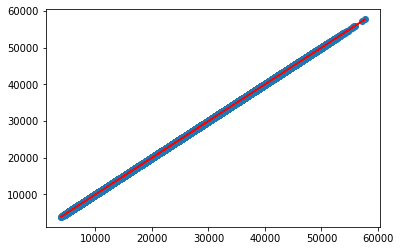

In [386]:
Y_pred = results.predict(X)

plt.scatter(x = Y_pred, y = Y)
plt.plot(Y, Y,'r') 

### Use DNN Regression

In [401]:
X = data[['X1','X2','X3']]
X = X.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
Y = data['Y']

In [402]:
feat_x1 = tf.feature_column.numeric_column('X1')
feat_x2 = tf.feature_column.numeric_column('X2')
feat_x3 = tf.feature_column.numeric_column('X3')
feat_x4 = tf.feature_column.numeric_column('X4')

feat_cols = [feat_x1,feat_x2]

In [403]:
#Model
dnn_model = tf.estimator.DNNRegressor(hidden_units=[100,100,100],feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/s2/82vv6ll16mn27w7gcdbccp3m0000gn/T/tmphkag7297', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [404]:
#Imput funciton
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X,y=Y,batch_size=10000,num_epochs=10,shuffle=True)

In [ ]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/s2/82vv6ll16mn27w7gcdbccp3m0000gn/T/tmphkag7297/model.ckpt.
INFO:tensorflow:loss = 624828500.0, step = 0
INFO:tensorflow:global_step/sec: 14.3651
INFO:tensorflow:loss = 625276900.0, step = 100 (6.963 sec)
INFO:te

In [ ]:
#Evaluation funciton 
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
      x=X,
      y=Y,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [ ]:
results = dnn_model.evaluate(eval_input_func)

In [340]:
print(results)


{'average_loss': 114390.21, 'label/mean': 621.9202, 'loss': 114390.32, 'prediction/mean': 729.9542, 'global_step': 1000}


In [ ]:
predictions = []# np.array([])
for x in dnn_model.predict(input_fn=eval_input_func):
    predictions.append(x['predictions'])

In [302]:
len(predictions)

1000000

In [ ]:
plt.scatter(x = predictions, y = Y)
plt.plot(Y, Y,'r') 